In [200]:
import numpy as np
import pandas as pd 
import networkx as nx
import math
import sympy as sp
import matplotlib.pyplot as plt
import time

from sklearn import linear_model
from sklearn.metrics import r2_score

from sympy import *
from numpy import linalg as LA
from numpy.linalg import matrix_rank
from array import array
from scipy.optimize import curve_fit

In [3]:
#Establecer directorio de datos

DIR='/Users/alex/Desktop'
FILE='/MatrizAdjSano/MatrizAdjSano/adjmatrix_UNS.txt'

file='{}{}'.format(DIR,FILE)

print('File directory:{}'.format(file))



File directory:/Users/alex/Desktop/MatrizAdjSano/MatrizAdjSano/adjmatrix_UNS.txt


In [4]:
data=pd.read_table(file)

In [5]:
data.head()

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000001036,ENSG00000001167,ENSG00000001460,ENSG00000001461,ENSG00000001497,...,hsa-mir-941-5,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-9500,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
0,1.0,0.103197,0.152306,0.107439,0.151863,0.050207,0.047916,0.152306,0.162813,0.032128,...,0.038779,0.016197,0.052990,0.062391,0.070298,0.038779,0.044215,0.259474,0.151107,0.074188
1,NaN,1.000000,0.120830,0.128810,0.121863,0.076382,0.064962,0.120830,0.250164,0.102605,...,0.108833,0.124237,0.120423,0.125844,0.020272,0.108833,0.127723,0.069236,0.199134,0.112418
2,NaN,NaN,1.000000,0.051569,0.107554,0.057486,0.038834,0.334130,0.248721,0.048574,...,0.059112,0.044184,0.051950,0.091854,0.071886,0.059112,0.030633,0.097257,0.045373,0.075525
3,NaN,NaN,NaN,1.000000,0.032182,0.069682,0.042741,0.051569,0.126349,0.051244,...,0.054916,0.133838,0.062266,0.132682,0.021764,0.054916,0.103477,0.123546,0.184396,0.057522
4,NaN,NaN,NaN,NaN,1.000000,0.214658,0.029944,0.107554,0.108194,0.094873,...,0.102947,0.156264,0.069491,0.128388,0.018218,0.102947,0.094818,0.178692,0.051804,0.064486


In [6]:
a=np.diag(np.ones(16748),0)
A=data-a

In [9]:
threshold = A.mean().mean()

In [7]:
threshold

0.08567775225309081

In [10]:
#https://stackoverflow.com/questions/13914920/networkx-extract-the-connected-component-containing-a-given-node-directed-grap?fbclid=IwAR0CLa62zO8y43PVzLDO54AZEo8Gozv4ai8hJDFKXXcgc8mZlN95wu3Xlio

#Función para ver qué forma tiene la matriz del data set que estamos
#estudiando 

def mat_shape(mat,n):
    
    new_data=mat.iloc[:n,:n]
    
    new_data2=new_data.apply(lambda x:(np.where(x<threshold,0,x)))
    adj_mat=new_data2.apply(lambda x:(np.where(x>threshold,1,x)))
    
    #completar la matriz triangular superior para tener la forma completa de una matriz
    # simétrica
    
    adj_mod=np.matrix(adj_mat.fillna(0))
    adj_mod_trans=adj_mod.transpose()
    simm_mat=adj_mod+adj_mod_trans
    
    
    return simm_mat


In [11]:
#Función para calcular el polinomio característico de la matriz laplaciana sin signo

def pol_char_from_signless_lap(mat,n):
    
    
    simm_mat=mat_shape(mat,n)
    
    Adj_to_nx=nx.from_numpy_matrix(simm_mat)
    L_from_Adj=nx.laplacian_matrix(Adj_to_nx)
    
    L_arr=L_from_Adj.toarray()
    L_np=np.matrix(L_arr)
    
    deg_Mat=L_np+simm_mat
    
    L_WO_Sign=deg_Mat+simm_mat
    
    pol_char=np.poly(L_WO_Sign)
    
    
    
    return pol_char

In [10]:
pol_char_from_signless_lap(A,3)

array([ 1., -6.,  9., -4.])

In [10]:
#Función para obtener el polinomio característico de la matriz laplaciana sin signo

#Esta función resultó estar poco optimizada pues el tiempo que tomaba para realiar los 
#cálculos era demasiado extenso debido a que daba un resultado simbólico y numérico

def pol_char_from_lap(mat,n):
    
   
    simm_mat=mat_shape(mat,n)
    
    Adj_to_nx=nx.from_numpy_matrix(simm_mat)
    L_from_Adj=nx.laplacian_matrix(Adj_to_nx)
    
    L_arr=L_from_Adj.toarray()
    L_np=np.matrix(L_arr)
    
    deg_Mat=L_np+simm_mat
    
    L_WO_Sign=deg_Mat+simm_mat
    
    data_modx2=sp.Matrix(L_WO_Sign)
    
    lamda=symbols("lamda")
    pol=data_modx2.charpoly(lamda)


    
    return print(pol),print(pol.coeffs())

## Análisis de la matriz laplciana sin signo para datos UNS

### 1000 genes

In [16]:
pol_char_from_signless_lap(A,1000)

array([ 1.00000000e+00, -4.11320000e+05,  8.45009745e+10, ...,
                   inf,            -inf,             inf])

## 2000 genes

In [17]:
pol_char_from_signless_lap(A,2000)

array([ 1.00000000e+00, -1.64580800e+06,  1.35361396e+12, ...,
                   inf,            -inf,             inf])

## 3000 genes 

In [19]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,3000)

final = time.perf_counter()

print("Los coeficientes del polinomiocaracterístico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")


Los coeficientes del polinomiocaracterístico son [ 1.00000000e+00 -3.69525200e+06  6.82499985e+12 ...             inf
            -inf             inf]
El tiempo de ejecución fue de  44.23430857100038 segundos


## 4000 genes

In [20]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,4000)

final = time.perf_counter()

print("Los coeficientes del polinomio característico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

Los coeficientes del polinomiocaracterístico son [ 1.00000000e+00 -6.56978600e+06  2.15752514e+13 ...             inf
            -inf             inf]
El tiempo de ejecución fue de  107.77007454400018 segundos


## 5000 genes

In [21]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,5000)

final = time.perf_counter()

print("Los coeficientes del polinomio característico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

Los coeficientes del polinomio característico son [ 1.0000000e+00 -1.0210350e+07  5.2114444e+13 ...            inf
           -inf            inf]
El tiempo de ejecución fue de  205.6521276049998 segundos


## 6000 genes


In [22]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,6000)

final = time.perf_counter()

print("Los coeficientes del polinomio característico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

Los coeficientes del polinomio característico son [ 1.00000000e+00 -1.46468160e+07  1.07245459e+14 ...             inf
            -inf             inf]
El tiempo de ejecución fue de  436.0252981089998 segundos


## 7000 genes

In [23]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,7000)

final = time.perf_counter()

print("Los coeficientes del polinomio característico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

Los coeficientes del polinomio característico son [ 1.00000000e+00 -1.99368900e+07  1.98709385e+14 ...             inf
            -inf             inf]
El tiempo de ejecución fue de  975.9227132810001 segundos


## 8000 genes

In [24]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,8000)

final = time.perf_counter()

print("Los coeficientes del polinomio característico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

Los coeficientes del polinomio característico son [ 1.00000000e+00 -2.60351080e+07  3.38868045e+14 ...             inf
            -inf             inf]
El tiempo de ejecución fue de  1666.6188906359994 segundos


## 9000 genes

In [26]:
inicio = time.perf_counter()

polinomio = pol_char_from_signless_lap(A,9000)

final = time.perf_counter()

print("Los coeficientes del polinomio característico son", polinomio)

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

Los coeficientes del polinomio característico son [ 1.00000000e+00 -3.28173100e+07  5.38423879e+14 ...             inf
            -inf             inf]
El tiempo de ejecución fue de  6737.1762727979985 segundos


### Primeros 40 arrays representando los coeficientes del polinomio característico de los primeros 1000 genes.

In [165]:
# Para calcular los genes que se tomaron para cada uno de los arrays que se obtendrán 
# después de esta función, se usa el siguinte algoritmo

n=1 #valor inicial de filas y columnas tomadas
while n < 902:
    m=n
    for m in range (m,m+100,33):
        
        print(m)
    
    n=n+100

1
34
67
100
101
134
167
200
201
234
267
300
301
334
367
400
401
434
467
500
501
534
567
600
601
634
667
700
701
734
767
800
801
834
867
900
901
934
967
1000


In [474]:
# Para calcular los genes que se tomaron para cada uno de los arrays que se obtendrán 
# después de esta función, se usa el siguinte algoritmo

n=100 #valor inicial de filas y columnas tomadas
while n < 1100:
    m=n
    for m in range (m,m+100,100):
        
        print(m)
    
    n=n+100

100
200
300
400
500
600
700
800
900
1000


## Función para obtener lista de listas de los coeficientes del polinomio característico

In [72]:
#Esta es la función correcta
# a -> valor inicial de la iteración(corresponde al número de filas y columnas inciciales 
# tomadas de la matriz laplaciana sin signo)

# b -> cota superior de los valores de filas/columnas tomadas

# c -> aumentos que tendrá n en cada iteración 

# d -> incremento que tendrá la secuencia de números den range

# e -> aumento que debe tener el valor n cada que se inicia un nuevo ciclo for 

def cal_sev_coeff(a,b,c,d,e): 
    
    arr=[]
    n=a
    
    while n < b:
        
        m=n
        for m in range(m,m+c,d):
            
            pol = pol_char_from_signless_lap(A,m)
            pol_list = pol.tolist()
            
            arr.append(pol_list)
            
        n=n+e
            
    return arr          

In [138]:
# Función para calcular la conectividad algebraica a partir del out put 
# de la función anterior. Simplemente se multiplica por (- 1/2) cada
# componente de la lista que arroja la función anterior.

def get_alg_conn(lista_param):
    
    lista = []
    for num in lista_param:
        
        lista.append(- num/2)
        
    return lista  

# Pruebas para calcular varios coficientes

In [67]:
arr=[]
n=1 #valor inicial de filas y columnas tomadas
while n < 4: 
    
    m=n
    for m in range (m,m+1,3): # se hace un salto de 33 en 33 pues sólo se quieren 
                                 #obtener 40 arrays de los primeros 1000 genes 
        
        pol = pol_char_from_signless_lap(A,m)
        pol_list = pol.tolist()
        #print(pol_list)
    
        #sub = elem.split(',')
        arr.append(pol_list)
            
        print(arr)
        
        
        n=n+1

[[1.0, 0.0]]
[[1.0, 0.0], [1.0, -2.0, 0.0]]
[[1.0, 0.0], [1.0, -2.0, 0.0], [1.0, -5.999999999999999, 8.999999999999996, -3.999999999999998]]


In [69]:
# Para calcular los genes que se tomaron para cada uno de los arrays que se obtendrán 
# después de esta función, se usa el siguinte algoritmo

n=100 #valor inicial de filas y columnas tomadas
while n < 1100:
    m=n
    for m in range (m,m+100,100):
        
        print(m)
    
    n=n+100

100
200
300
400
500
600
700
800
900
1000


In [70]:
# Para calcular los genes que se tomaron para cada uno de los arrays que se obtendrán 
# después de esta función, se usa el siguinte algoritmo

n=10 #valor inicial de filas y columnas tomadas
while n < 110:
    m=n
    for m in range (m,m+10,10):
        
        print(m)
    
    n=n+10

10
20
30
40
50
60
70
80
90
100


In [77]:
list_first_100 = cal_sev_coeff(10,110,10,10,10)

In [79]:
coeff_first_100=[arr[1] for arr in list_first_100]
coeff_first_100

[-46.000000000000036,
 -159.99999999999994,
 -333.9999999999999,
 -607.9999999999995,
 -992.0000000000002,
 -1419.9999999999993,
 -1934.0000000000014,
 -2652.000000000001,
 -3308.000000000001,
 -4140.000000000002]

In [139]:
get_alg_conn(coeff_first_100)
    

[23.000000000000018,
 79.99999999999997,
 166.99999999999994,
 303.9999999999998,
 496.0000000000001,
 709.9999999999997,
 967.0000000000007,
 1326.0000000000005,
 1654.0000000000005,
 2070.000000000001]

# Conectividad Algebraica

### Primeros 1000 genes (de 100 en 100)

In [97]:
# Para calcular los genes que se tomaron para cada uno de los arrays que se obtendrán 
# después de esta función, se usa el siguinte algoritmo

n=100 #valor inicial de filas y columnas tomadas
while n < 2100:
    m=n
    for m in range (m,m+100,100):
        
        print(m)
    
    n=n+100

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


In [85]:
list_first_1000 = cal_sev_coeff(100,1100,100,100,100)


In [92]:
coeff_first_1000=[arr[1] for arr in list_first_1000]
coeff_first_1000

[-4140.000000000002,
 -16948.00000000002,
 -38042.00000000006,
 -66052.00000000004,
 -102478.00000000004,
 -146780.0000000003,
 -201736.0000000003,
 -264750.00000000064,
 -333826.0000000005,
 -411320.0000000009]

In [141]:
alg_conn1 = get_alg_conn(coeff_first_1000)


### Desde el gen 1000 hasta el 2000 (de 100 en 100)

In [93]:
list_2000 = cal_sev_coeff(1100,2100,100,100,100)

In [94]:
coeff_2000=[arr[1] for arr in list_2000]
coeff_2000

[-501440.00000000134,
 -596028.0000000008,
 -698224.0000000008,
 -810344.0000000013,
 -934916.000000001,
 -1056910.0000000023,
 -1199338.000000003,
 -1342138.0000000007,
 -1489470.0000000026,
 -1645808.000000002]

In [140]:
alg_conn2 = get_alg_conn(coeff_2000)



In [96]:
pol_char_from_signless_lap(A,2000)

array([ 1.00000000e+00, -1.64580800e+06,  1.35361396e+12, ...,
                   inf,            -inf,             inf])

### Desde el gen 2000 hasta el 3000 (de 100 en 100)

In [99]:
inicio = time.perf_counter()

list__3000 = cal_sev_coeff(2100,3100,100,100,100)

final = time.perf_counter()

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

El tiempo de ejecución fue de  309.6622155130008 segundos


In [101]:
coeff_3000=[arr[1] for arr in list__3000]
coeff_3000

[-1810374.000000002,
 -1993952.000000006,
 -2174546.000000006,
 -2372716.0000000065,
 -2574236.000000006,
 -2783772.000000004,
 -3005102.0000000023,
 -3227890.000000006,
 -3458056.0000000126,
 -3695252.000000009]

In [142]:
alg_conn3 = get_alg_conn(coeff_3000)

### Desde el gen 3000 hasta el 4000 (de 100 en 100)

In [103]:
inicio = time.perf_counter()

list_4000 = cal_sev_coeff(3100,4100,100,100,100)

final = time.perf_counter()

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

El tiempo de ejecución fue de  691.7550197669989 segundos


In [104]:
coeff_4000=[arr[1] for arr in list_4000]
coeff_4000

[-3937070.000000006,
 -4205056.000000006,
 -4463896.00000001,
 -4751984.000000011,
 -5017824.000000006,
 -5310285.999999998,
 -5614526.0000000205,
 -5920820.00000003,
 -6244442.000000025,
 -6569786.000000008]

In [143]:
alg_conn4 = get_alg_conn(coeff_4000)

### Desde el gen 4000 hasta el 5000 (de 100 en 100)

In [106]:
inicio = time.perf_counter()

list_5000 = cal_sev_coeff(4100,5100,100,100,100)

final = time.perf_counter()

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

El tiempo de ejecución fue de  1343.8364031600013 segundos


In [107]:
coeff_5000=[arr[1] for arr in list_5000]
coeff_5000

[-6909444.000000009,
 -7240658.000000012,
 -7586169.999999999,
 -7930306.0000000205,
 -8297390.0000000205,
 -8665640.000000037,
 -9042102.000000037,
 -9434446.000000034,
 -9816614.00000002,
 -10210350.000000017]

In [144]:
alg_conn5 = get_alg_conn(coeff_5000)

### Desde el gen 5000 hasta el 6000 (de 100 en 100)

In [110]:
inicio = time.perf_counter()

list_6000 = cal_sev_coeff(5100,6100,100,100,100)

final = time.perf_counter()

print("El tiempo de ejecución fue de ", final-inicio,"segundos")

El tiempo de ejecución fue de  2541.8040787930004 segundos


In [111]:
coeff_6000=[arr[1] for arr in list_6000]
coeff_6000

[-10631699.999999981,
 -11026308.00000003,
 -11441668.000000052,
 -11875442.000000054,
 -12336998.000000015,
 -12781837.999999952,
 -13232355.999999996,
 -13685882.000000013,
 -14169666.000000022,
 -14646816.000000037]

In [145]:
alg_conn6 = get_alg_conn(coeff_6000)

In [124]:
# Para calcular los genes que se tomaron para cada uno de los arrays que se obtendrán 
# después de esta función, se usa el siguinte algoritmo
lista_genes=[]
n=100 #valor inicial de filas y columnas tomadas
while n < 6100:
    m=n
    for m in range (m,m+100,100):
        
        lista_genes.append(m)
        n=n+100

print(lista_genes)
    
    

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000]


In [193]:
x_genes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000]

In [194]:
y_alg_conn = alg_conn1 + alg_conn2 + alg_conn3 +alg_conn4 +alg_conn5 +alg_conn6 

In [195]:
y_alg_conn_mod = np.array(x_alg_conn, dtype=np.float128)

In [196]:
y_alg_conn_mod

array([2.070000e+03, 8.474000e+03, 1.902100e+04, 3.302600e+04,
       5.123900e+04, 7.339000e+04, 1.008680e+05, 1.323750e+05,
       1.669130e+05, 2.056600e+05, 2.507200e+05, 2.980140e+05,
       3.491120e+05, 4.051720e+05, 4.674580e+05, 5.284550e+05,
       5.996690e+05, 6.710690e+05, 7.447350e+05, 8.229040e+05,
       9.051870e+05, 9.969760e+05, 1.087273e+06, 1.186358e+06,
       1.287118e+06, 1.391886e+06, 1.502551e+06, 1.613945e+06,
       1.729028e+06, 1.847626e+06, 1.968535e+06, 2.102528e+06,
       2.231948e+06, 2.375992e+06, 2.508912e+06, 2.655143e+06,
       2.807263e+06, 2.960410e+06, 3.122221e+06, 3.284893e+06,
       3.454722e+06, 3.620329e+06, 3.793085e+06, 3.965153e+06,
       4.148695e+06, 4.332820e+06, 4.521051e+06, 4.717223e+06,
       4.908307e+06, 5.105175e+06, 5.315850e+06, 5.513154e+06,
       5.720834e+06, 5.937721e+06, 6.168499e+06, 6.390919e+06,
       6.616178e+06, 6.842941e+06, 7.084833e+06, 7.323408e+06],
      dtype=float128)

In [197]:
len(y_genes)

60

In [198]:
len(x_alg_conn)

60

Text(0, 0.5, 'Número de bordes')

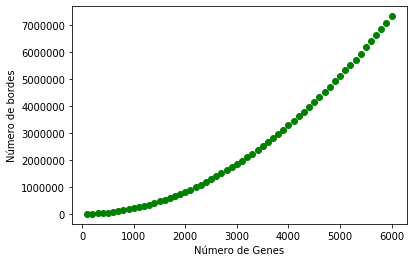

In [199]:
plt.plot(x_genes,y_alg_conn_mod,'o', color = 'green')
plt.xlabel("Número de Genes")
plt.ylabel("Número de bordes")

In [213]:
d ={'x':x_genes,'y':y_alg_conn}
data_f=pd.DataFrame(data=d)

In [236]:
np.log(2000)

7.600902459542082

In [211]:
import statsmodels.formula.api as smf

In [216]:
lm = smf.ols(formula="y~x",data =data_f).fit()

In [217]:
lm

In [219]:
lm.params

Intercept   -1.277400e+06
x            1.243831e+03
dtype: float64

In [220]:
lm.pvalues

Intercept    1.861097e-12
x            2.354916e-37
dtype: float64

In [221]:
lm.rsquared

0.9410647297957214

In [222]:
lm.rsquared_adj

0.9400486044473718

In [223]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     926.1
Date:                Thu, 22 Oct 2020   Prob (F-statistic):           2.35e-37
Time:                        16:26:40   Log-Likelihood:                -876.99
No. Observations:                  60   AIC:                             1758.
Df Residuals:                      58   BIC:                             1762.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.277e+06   1.43e+05     -8.911      0.000   -1.56e+06    -9.9e+05
x           1243.8309     40.872     30.432      0.000    1162.017    1325.645
==============================================================================
Omnibus:                        8.104   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                5.845
Skew:                           0.631   Prob(JB):                       0.0538
Kurtosis:                       2.137   Cond. No.                     7.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [225]:
edge_pred = lm.predict(pd.DataFrame(data_f["x"]))
edge_pred

0    -1.153017e+06
1    -1.028634e+06
2    -9.042510e+05
3    -7.798680e+05
4    -6.554849e+05
5    -5.311018e+05
6    -4.067187e+05
7    -2.823356e+05
8    -1.579525e+05
9    -3.356942e+04
10    9.081367e+04
11    2.151968e+05
12    3.395798e+05
13    4.639629e+05
14    5.883460e+05
15    7.127291e+05
16    8.371122e+05
17    9.614953e+05
18    1.085878e+06
19    1.210261e+06
20    1.334645e+06
21    1.459028e+06
22    1.583411e+06
23    1.707794e+06
24    1.832177e+06
25    1.956560e+06
26    2.080943e+06
27    2.205326e+06
28    2.329709e+06
29    2.454092e+06
30    2.578475e+06
31    2.702859e+06
32    2.827242e+06
33    2.951625e+06
34    3.076008e+06
35    3.200391e+06
36    3.324774e+06
37    3.449157e+06
38    3.573540e+06
39    3.697923e+06
40    3.822306e+06
41    3.946689e+06
42    4.071073e+06
43    4.195456e+06
44    4.319839e+06
45    4.444222e+06
46    4.568605e+06
47    4.692988e+06
48    4.817371e+06
49    4.941754e+06
50    5.066137e+06
51    5.190520e+06
52    5.3149

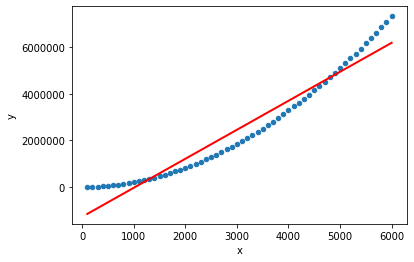

In [234]:
%matplotlib inline
data_f.plot(kind = "scatter", x = "x", y = "y")
plt.plot(pd.DataFrame(data_f["x"]), edge_pred, c= "red",linewidth=2)